In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

import matplotlib.cm as cm

In [2]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 1024 * 2)
wavelength = 5 * um

In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

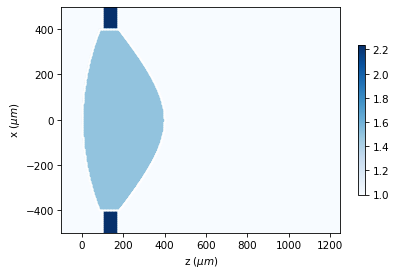

In [29]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refraction_index=1.5,
                                  cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.4 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refraction_index=1 + 2j)

lens.draw_refraction_index(draw_borders=True,
                           min_incr=0.01,
                           colormap_kind=cm.Blues,
                           colorbar_kind='vertical')

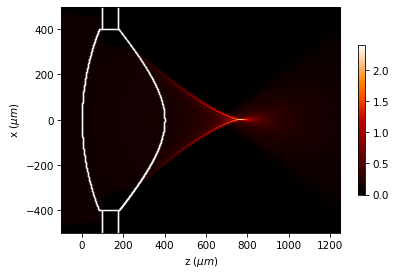

In [30]:
lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

focus distance f=465.12 um


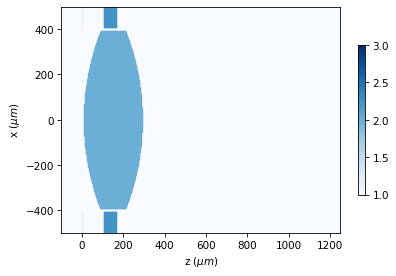

In [38]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 1024 * 2)
wavelength = .5 * um

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
focal, _ = lens.lens_convergent(r0=(0, 0),
                              aperture=.8 * mm,
                              radius=(1 * mm, -1 * mm),
                              thickness=300 * um,
                              refraction_index=2,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))
print("focus distance f={:2.2f} um".format(focal))

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refraction_index=1 + 2j)

lens.draw_refraction_index(draw_borders=True,
                           min_incr=0.01,
                           colormap_kind=cm.Blues,
                           colorbar_kind='vertical')

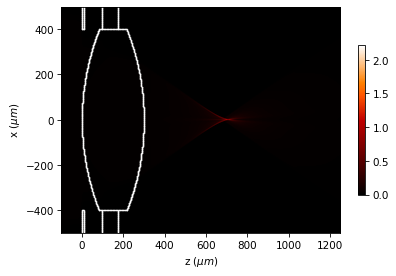

In [39]:
lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

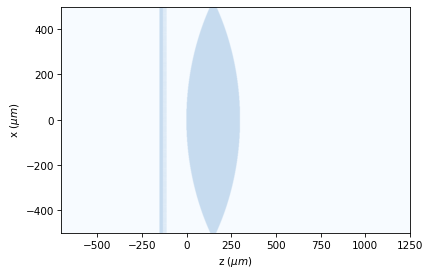

In [64]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.7 * mm, 1.25 * mm, 1024 * 2)
wavelength = 2 * um

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=2 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=-130 * um, z1=-110 * um, refraction_index=1.5)

focal, _ = t2.lens_convergent(r0=(0, 0),
                              aperture=1 * mm,
                              radius=(1 * mm, -1 * mm),
                              thickness=300 * um,
                              refraction_index=1.5,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))

t2.draw_refraction_index(draw_borders=False)

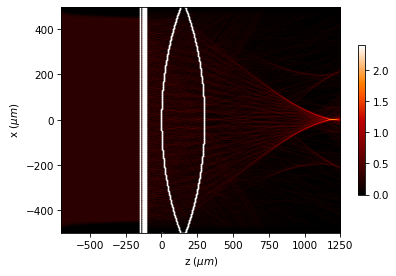

In [65]:
lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

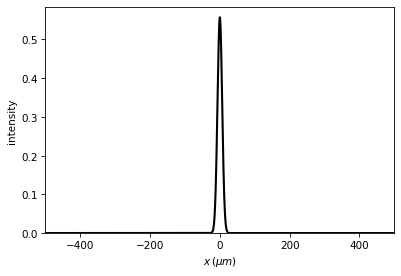

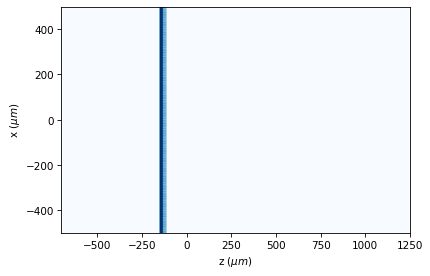

In [86]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.7 * mm, 1.25 * mm, 1024 * 2)
wavelength = 0.4 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=0 * degrees, 
              x0=0 * um, z0=-700 * um, w0=10 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=.1 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=-130 * um, z1=-110 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

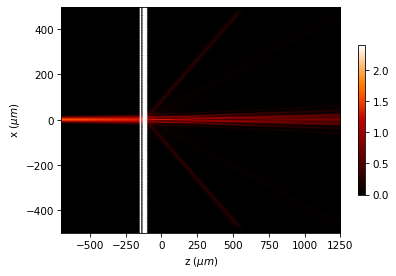

In [87]:
lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

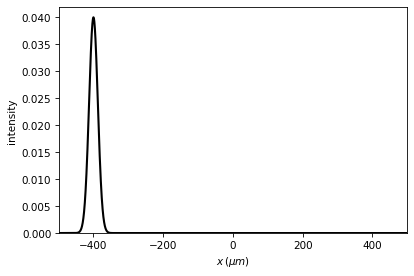

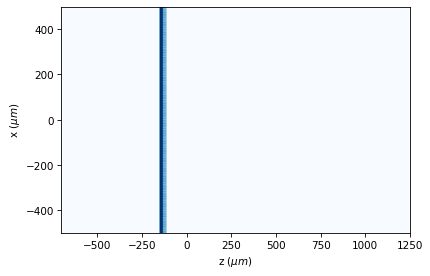

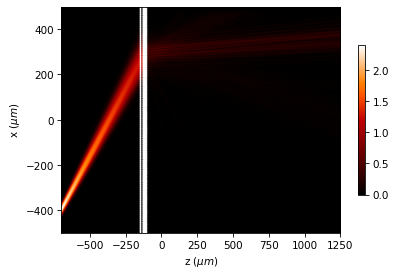

In [92]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.7 * mm, 1.25 * mm, 1024 * 2)
wavelength = 0.55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=50 * degrees, 
              x0=-400 * um, z0=-700 * um, w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=.1 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=-130 * um, z1=-110 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.WPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

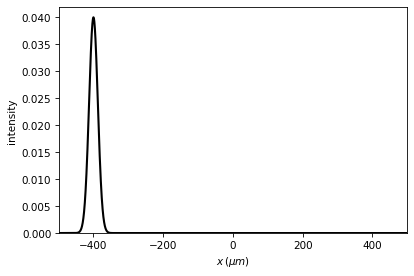

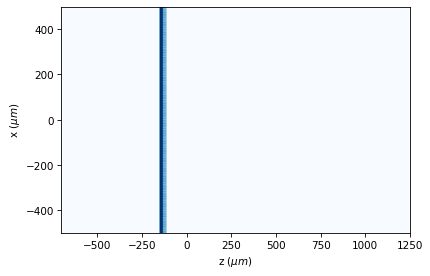

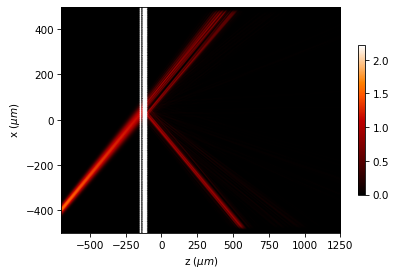

In [93]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.7 * mm, 1.25 * mm, 1024 * 2)
wavelength = 0.55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=50 * degrees, 
              x0=-400 * um, z0=-700 * um, w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=.1 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=-130 * um, z1=-110 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

array([4.14484652e-16, 1.73761291e-15, 4.14604058e-15, ...,
       2.13194755e-15, 6.13706170e-16, 7.76006406e-17])

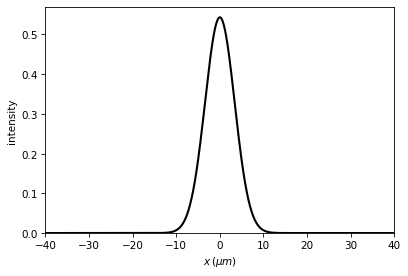

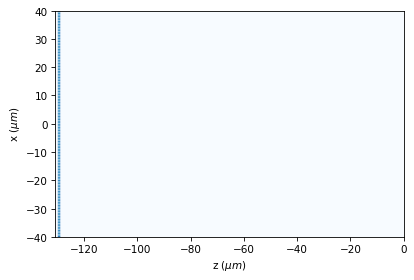

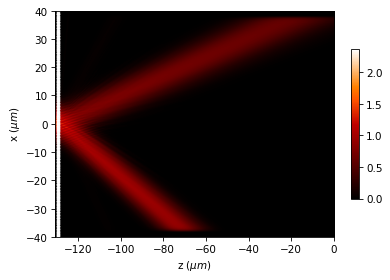

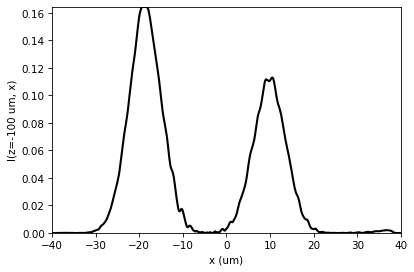

In [9]:
x0 = np.linspace(-40 * um, 40 * um, 1024 * 8)
z0 = np.linspace(-0.131 * mm, 0 * mm, 1024 * 4)
wavelength = 0.55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=20* degrees, 
              x0=0 * um, z0=-131 * um, w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=.55 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

# t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=-130 * um, z1=-129 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

lens.profile_transversal(kind='intensity',z0=-100*um)

array([5.87330628e-12, 5.23669287e-12, 4.19889149e-12, ...,
       5.64056184e-12, 6.22326763e-12, 6.21495118e-12])

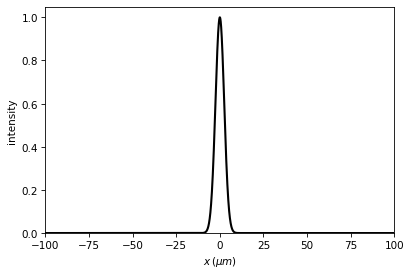

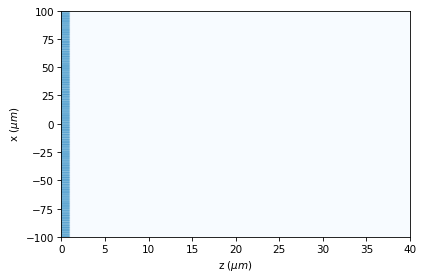

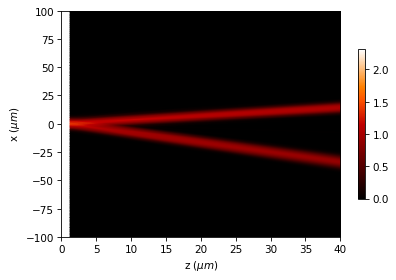

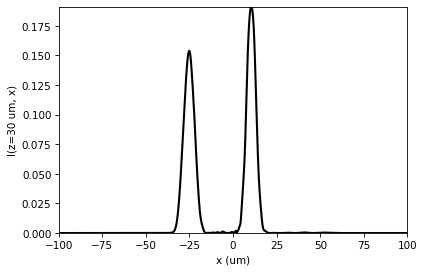

In [12]:
x0 = np.linspace(-100 * um, 100 * um, 1024 * 8)
z0 = np.linspace(-0 * mm, 0.04 * mm, 1024 * 4)
wavelength = 0.55 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=20* degrees, 
              x0=0 * um, z0=0 * um, w0=5 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=.55 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

# t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=0 * um, z1=1 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.WPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

lens.profile_transversal(kind='intensity',z0=30*um)

array([2.27258119e-18, 2.53754274e-18, 2.83261917e-18, ...,
       2.53625112e-18, 2.37406452e-18, 2.22242954e-18])

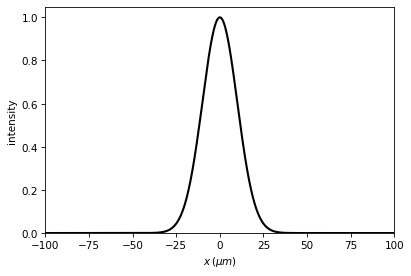

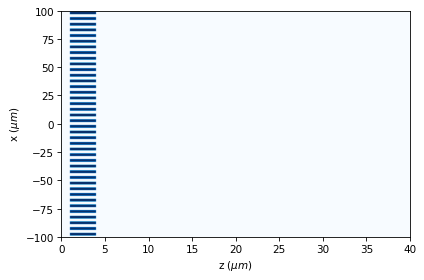

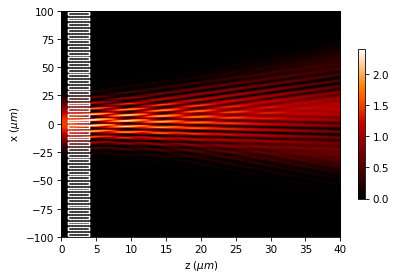

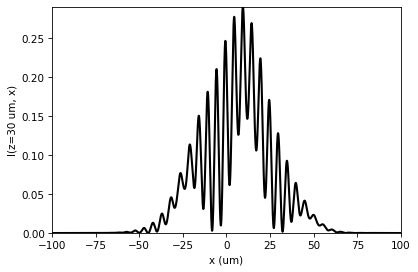

In [17]:
x0 = np.linspace(-100 * um, 100 * um, 1024 * 8)
z0 = np.linspace(-0 * mm, 0.04 * mm, 1024 * 4)
wavelength = 5 * um

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, theta=20* degrees, 
              x0=0 * um, z0=0 * um, w0=20 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=5 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

# t2.extrude_mask(t=t0, z0=-150 * um, z1=-130 * um, refraction_index=1.5)
t2.extrude_mask(t=t1, z0=1 * um, z1=4 * um, refraction_index=1.5)


t2.draw_refraction_index(draw_borders=False)

lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

lens.profile_transversal(kind='intensity',z0=30*um)

1498.6678507992895


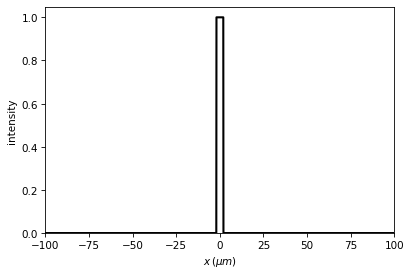

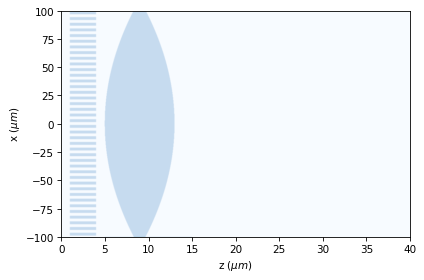

In [31]:
x0 = np.linspace(-100 * um, 100 * um, 1024 * 4)
z0 = np.linspace(-0 * mm, 0.04 * mm, 1024 * 2)
wavelength = 5 * um

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1,theta=20*degrees)
u0.pupil(x0=0,radius=2*um)
# u0.gauss_beam(A=1, theta=20* degrees, 
#               x0=0 * um, z0=0 * um, w0=20 * um,)
u0.draw(kind='intensity')

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=5 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t1, z0=1 * um, z1=4 * um, refraction_index=1.5)

focal, _ = t2.lens_convergent(r0=(0, 5),
                              aperture=.2 * mm,
                              radius=(1.5 * mm, -1.5 * mm),
                              thickness=8* um,
                              refraction_index=1.5,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))

t2.draw_refraction_index(draw_borders=False)
print(focal)

array([1.39733718e-08, 1.57632419e-08, 1.78291563e-08, ...,
       1.63419122e-08, 1.49460288e-08, 1.37251013e-08])

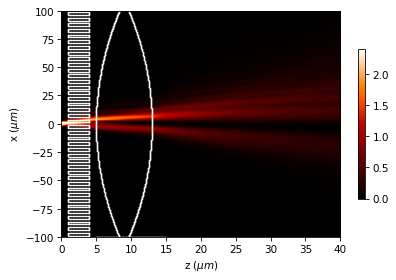

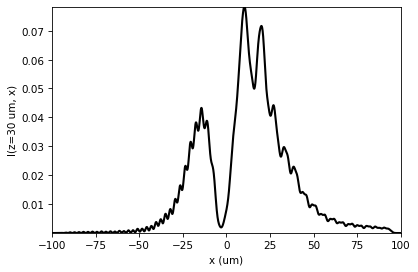

In [32]:
lens=t2
# lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens.incident_field(u0)
lens.clear_field()
lens.WPM(verbose=False)
lens.normalize()

lens.draw(kind='intensity',
          logarithm=1e1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')

lens.profile_transversal(kind='intensity',z0=30*um)